# 🧠 AI Jobs Salary Prediction & Exploratory Analysis

This project explores the landscape of AI-related job roles using real-world salary data. By combining exploratory data analysis (EDA) with predictive modeling techniques (Linear Regression & Random Forest), the goal is to uncover key patterns and factors influencing salaries in the AI job market.

## Objectives:
- Understand salary distribution and industry trends.
- Identify top-paying roles and sectors.
- Analyze the relationship between experience level and salary.
- Build predictive models to estimate salaries using job-related features.

## Dataset: A cleaned and enriched dataset of 15,000+ AI job records with attributes like job title, company size, experience level, employment type, and more.

🔧 Tools & Techniques:
- Python (pandas, seaborn, scikit-learn)
- Data preprocessing (scaling, encoding)
- Regression models (Linear, Random Forest)
- Correlation heatmaps, barplots, and boxplots for insights

---

Let’s dive into the data and uncover what drives compensation in the AI workforce.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\wasee\OneDrive\Desktop\ai_job_dataset.csv")
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [5]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [6]:
df['experience_level'] = df['experience_level'].map({'EN':1,'MI':2,'SE':3,'EX':4});  

In [7]:
df['company_size'] = df['company_size'].map({'S':1,'M':2,'L':3}); 

In [8]:
df['education_required'] = df['education_required'].map({'Bachelor':1,'Master':2,'Associate':3,'PhD':4});  

In [9]:
df = pd.get_dummies(df,columns=['employment_type'],drop_first=True);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  int64  
 5   company_location        15000 non-null  object 
 6   company_size            15000 non-null  int64  
 7   employee_residence      15000 non-null  object 
 8   remote_ratio            15000 non-null  int64  
 9   required_skills         15000 non-null  object 
 10  education_required      15000 non-null  int64  
 11  years_experience        15000 non-null  int64  
 12  industry                15000 non-null  object 
 13  posting_date            15000 non-null  object 
 14  application_deadline    15000 non-null

In [11]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,company_location,company_size,employee_residence,remote_ratio,required_skills,...,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,employment_type_FL,employment_type_FT,employment_type_PT
0,AI00001,AI Research Scientist,90376,USD,3,China,2,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",...,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,False,False,False
1,AI00002,AI Software Engineer,61895,USD,1,Canada,2,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",...,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,False,False,False
2,AI00003,AI Specialist,152626,USD,2,Switzerland,3,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",...,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,True,False,False
3,AI00004,NLP Engineer,80215,USD,3,India,2,India,50,"Scala, SQL, Linux, Python",...,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,True,False,False
4,AI00005,AI Consultant,54624,EUR,1,France,1,Singapore,100,"MLOps, Java, Tableau, Python",...,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,False,False,True


In [12]:
columns_to_drop = ['posting_date', 'application_deadline', 'job_description_length', 'benefits_score']
df = df.drop(columns=columns_to_drop)


In [13]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,company_name,employment_type_FL,employment_type_FT,employment_type_PT
0,AI00001,AI Research Scientist,90376,USD,3,China,2,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",1,9,Automotive,Smart Analytics,False,False,False
1,AI00002,AI Software Engineer,61895,USD,1,Canada,2,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",2,1,Media,TechCorp Inc,False,False,False
2,AI00003,AI Specialist,152626,USD,2,Switzerland,3,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",3,2,Education,Autonomous Tech,True,False,False
3,AI00004,NLP Engineer,80215,USD,3,India,2,India,50,"Scala, SQL, Linux, Python",4,7,Consulting,Future Systems,True,False,False
4,AI00005,AI Consultant,54624,EUR,1,France,1,Singapore,100,"MLOps, Java, Tableau, Python",2,0,Media,Advanced Robotics,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,1,Finland,1,Finland,50,"Java, Kubernetes, Azure",1,1,Energy,Advanced Robotics,True,False,False
14996,AI14997,Machine Learning Researcher,57811,GBP,1,United Kingdom,2,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",2,0,Government,Smart Analytics,False,False,False
14997,AI14998,NLP Engineer,189490,USD,4,South Korea,3,South Korea,50,"Scala, Spark, NLP",3,17,Manufacturing,AI Innovations,False,False,False
14998,AI14999,Head of AI,79461,EUR,1,Netherlands,2,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",4,1,Real Estate,Smart Analytics,False,True,False


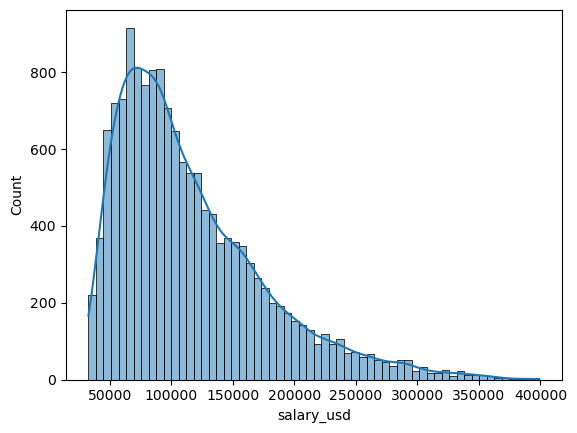

In [49]:
sns.histplot(df,x='salary_usd',kde=True);

## Salary Distribution Analysis

The following histogram shows the distribution of salaries (`salary_usd`) across the dataset:

### Key Observations:

- **Right-skewed distribution**:  
  The data is heavily concentrated on the left side (between $50,000 to $120,000), with a long tail stretching toward higher salary values.  
  This indicates a **positively skewed** distribution — a few high-salary outliers are pulling the mean upwards.

- **Most common salary range**:  
  The majority of employees earn between **$60,000 and $110,000**, with the peak around **$80,000**.

- **Presence of outliers**:  
  Salaries above **$200,000** are rare and likely represent high-level roles, niche expertise, or specific geographic influences.

### Implications for Modeling:

- **Normalization or log transformation** might be beneficial, especially for linear models that assume normality.
- Consider using **robust metrics** (e.g., median) for central tendency to reduce the impact of outliers.
- A **Random Forest Regressor** (which you already used) is robust to skewed distributions and non-linear relationships.

---

✅Histogram plotted using:

sns.histplot(df, x='salary_usd', kde=True)


In [15]:
df.describe()

,salary_usd,experience_level,company_size,remote_ratio,education_required,years_experience
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,2.502867,1.999400,49.483333,2.490133,6.253200
std,60260.940438,1.116755,0.816728,40.812712,1.116058,5.545768
min,32519.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,70179.750000,2.000000,1.000000,0.000000,1.000000,2.000000
50%,99705.000000,3.000000,2.000000,50.000000,2.000000,5.000000
75%,146408.500000,4.000000,3.000000,100.000000,3.000000,10.000000
max,399095.000000,4.000000,3.000000,100.000000,4.000000,19.000000


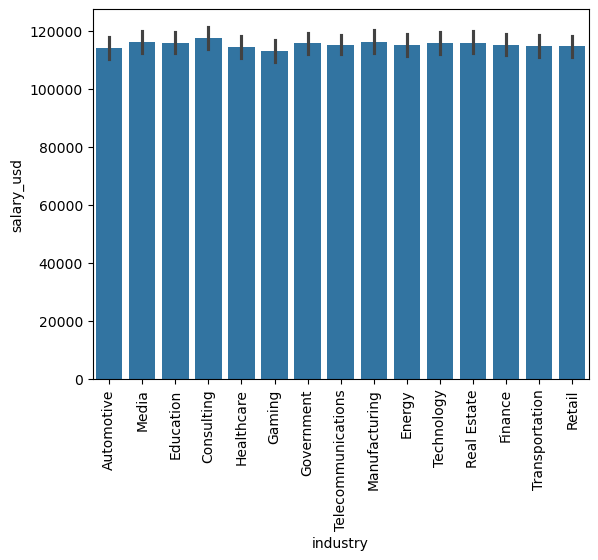

In [16]:
sns.barplot(df,x='industry',y='salary_usd')
plt.xticks(rotation= 90);

##  Average Salary by Industry

The barplot below illustrates the **mean salary (`salary_usd`)** across different industries:

###  Key Observations:

- **Relatively uniform salaries**:  
  Average salaries across industries are **surprisingly close** — mostly centered around **$115,000–$120,000**, with minor variation.

- **Slightly higher pay** in:  
  - `Gaming`, `Consulting`, and `Energy` sectors seem to slightly outperform others in average compensation.
  
- **Slightly lower pay** in:  
  - `Education`, `Retail`, and `Media` show marginally lower averages, though still within a competitive range.

- **Error bars (standard error)**:  
  Vertical black lines represent uncertainty around the mean. Some industries (like `Media` and `Retail`) have **larger error bars**, possibly due to smaller sample sizes or more variable salaries.

---

✅ Barplot code:

sns.barplot(df, x='industry', y='salary_usd')
plt.xticks(rotation=90)


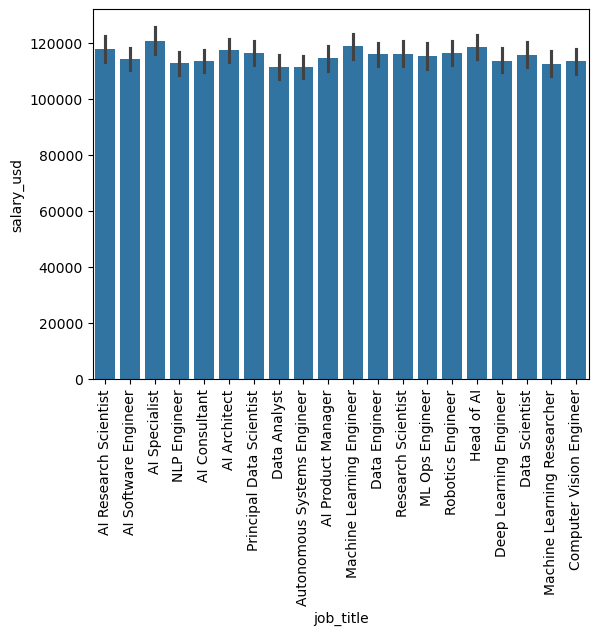

In [50]:
sns.barplot(df,x='job_title',y='salary_usd')
plt.xticks(rotation= 90);

##  Average Salary by Job Title

The following chart presents the **mean salary (`salary_usd`)** across various AI-related job titles.

###  Key Insights:

- **AI Specialist** appears to earn **the highest average salary** among all titles, even slightly more than roles like:
  - `AI Research Scientist`
  - `Principal Data Scientist`
  - `AI Architect`

- Roles like **`Data Analyst`**, **`NLP Engineer`**, and **`AI Consultant`** tend to have **slightly lower averages**, but still remain competitive.

- **Error bars** suggest some variability within each title group — for example, roles like `AI Architect` or `Research Scientist` may include a wider range of salary levels (junior to senior).

---

✅ Code used:
sns.barplot(df, x='job_title', y='salary_usd')
plt.xticks(rotation=90)


In [51]:
def summarize_categorical_distribution(df, column):
    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    return summary

In [53]:
summarize_categorical_distribution(df,'job_title')

,Count,Percentage
job_title,,
Machine Learning Researcher,808,5.39
AI Software Engineer,784,5.23
Autonomous Systems Engineer,777,5.18
Machine Learning Engineer,772,5.15
AI Architect,771,5.14
Head of AI,765,5.10
NLP Engineer,762,5.08
Robotics Engineer,759,5.06
Data Analyst,759,5.06


##  Job Title Distribution

The dataset includes a diverse representation of AI-related job roles. The most common titles are:

| Job Title                    | Count | Percentage |
|-----------------------------|--------|-------------|
| Machine Learning Researcher | 808    | 5.39%       |
| AI Software Engineer        | 784    | 5.23%       |
| Autonomous Systems Engineer | 777    | 5.18%       |
| ...                         | ...    | ...         |
| **AI Specialist**           | 728    | **4.85%**   |

Despite **AI Specialist** having **one of the lowest frequencies** (only 728 out of all entries), it recorded the **highest average salary** in the bar plot analysis.

### Interpretation:

- The **high salary** of AI Specialists is **not due to overrepresentation**, but rather **true market value** reflected in the dataset.
- This **strengthens the finding** that AI Specialist roles may be more senior, high-impact, or scarce.
- Further investigation could examine:
  - Experience levels within this group
  - Company size or location
  - Job description complexity



In [18]:
def top_n_by_column(df, group_col, target_col, n=5):
    """ Returns top N values grouped by one column using the sum of another column. """
    return df.groupby(group_col)[target_col].mean().sort_values(ascending=False).head(n)


In [19]:
top_n_by_column(df, 'industry', 'salary_usd' ,n=5)

industry
Consulting       117602.142157
Manufacturing    116162.888773
Media            116127.730144
Education        116026.803347
Real Estate      115919.095333
Name: salary_usd, dtype: float64

##  Top 5 Industries by Average Salary (USD)

Using group-level aggregation, we identified the five industries with the **highest average salaries**:

| Industry       | Avg. Salary (USD) |
|----------------|-------------------|
| Consulting     | 117,602           |
| Manufacturing  | 116,163           |
| Media          | 116,128           |
| Education      | 116,027           |
| Real Estate    | 115,919           |

###  Insights:
- **Consulting** leads the chart, reflecting a high demand for strategic AI roles and domain expertise.
- **Media and Education** surprisingly appear in the top 5, suggesting niche or specialized AI roles (e.g., AI in EdTech or Content Recommendation Systems).
- Industries with high salaries may not always correlate with highest hiring volumes — but often with expertise intensity.


In [20]:
df.drop(columns=['salary_currency'], inplace=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_id              15000 non-null  object
 1   job_title           15000 non-null  object
 2   salary_usd          15000 non-null  int64 
 3   experience_level    15000 non-null  int64 
 4   company_location    15000 non-null  object
 5   company_size        15000 non-null  int64 
 6   employee_residence  15000 non-null  object
 7   remote_ratio        15000 non-null  int64 
 8   required_skills     15000 non-null  object
 9   education_required  15000 non-null  int64 
 10  years_experience    15000 non-null  int64 
 11  industry            15000 non-null  object
 12  company_name        15000 non-null  object
 13  employment_type_FL  15000 non-null  bool  
 14  employment_type_FT  15000 non-null  bool  
 15  employment_type_PT  15000 non-null  bool  
dtypes: bool(3), int64(6), 

In [22]:
def cluster_correlation(df):
    """
    رسم Clustermap لعلاقات الأعمدة الرقمية بشكل عنقودي.
    ممتاز لفهم التشابه بين المتغيرات.
    مثال:
        cluster_correlation(df)
    """
    sns.clustermap(df.corr(numeric_only=True), annot=True, cmap='vlag')
    plt.title("Clustered Correlation Heatmap")
    plt.show()

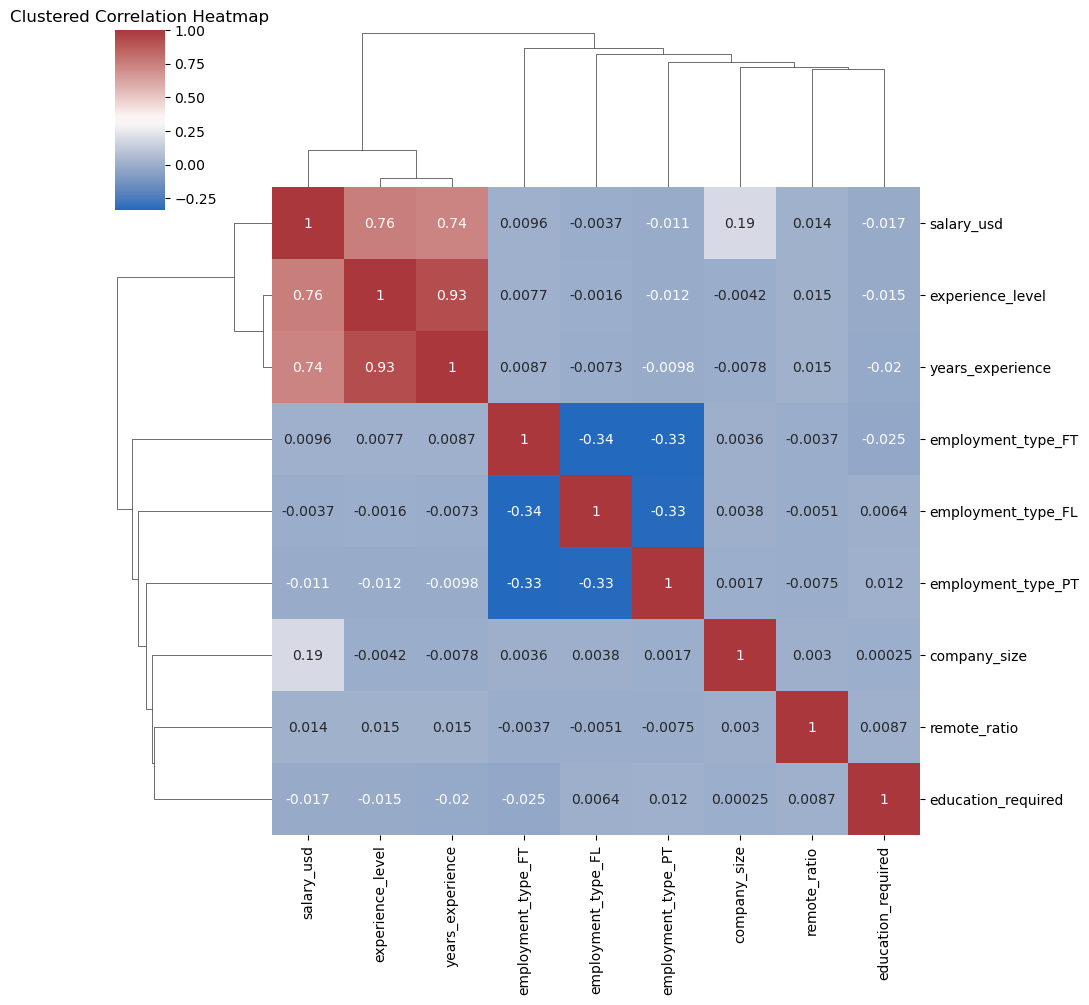

In [23]:
cluster_correlation(df)

##  Correlation Analysis of Key Features

The correlation heatmap below shows the pairwise Pearson correlations between numerical features in the dataset. Notable findings include:

- 🧠 **Years of Experience** and **Experience Level** are very strongly correlated (r = 0.93), which is expected.
- 💰 **Salary (salary_usd)** has:
  - Strong correlation with **experience_level** (r = 0.76)
  - Strong correlation with **years_experience** (r = 0.74)
  - Weak correlation with **company_size** (r = 0.19)
  - Slight **negative correlation** with **employment_type_FT** and **employment_type_FL** (-0.33 to -0.34)
- 🧩 **Employment types** are negatively correlated with each other, reflecting their mutually exclusive binary encoding.
- 🧑‍💻 **Remote ratio** and **education_required** have minimal correlation with salary or experience.

###  Insights:
- Years of experience is a strong predictor of salary.
- Full-time or freelance roles (encoded as `employment_type_FT`, `employment_type_FL`) have a **slightly negative** relation to salary — possibly due to higher compensation in contract-based or part-time specialized AI roles.
- Weak correlation between salary and company size suggests **pay is not driven solely by company scale** but rather by role specialization and experience.


In [24]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(df):
    """
    حساب VIF لكشف التكرار القوي بين الأعمدة (Multicollinearity).
    ترجع النتائج مرتبة من الأعلى للأقل حسب VIF.
    """
    X = add_constant(df.select_dtypes(include='number').dropna())
    vif_df = pd.DataFrame()
    vif_df["feature"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    #  ترتيب النتائج من الأعلى إلى الأقل
    vif_df = vif_df.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    
    return vif_df

In [25]:
calculate_vif(df)

,feature,VIF
0,const,24.553747
1,experience_level,7.718115
2,years_experience,7.203740
3,salary_usd,2.634221
4,company_size,1.100423
5,education_required,1.000580
6,remote_ratio,1.000335


In [26]:
df.drop(columns=['years_experience'],inplace=True)


In [27]:
calculate_vif(df)

,feature,VIF
0,const,18.678722
1,salary_usd,2.567850
2,experience_level,2.474256
3,company_size,1.096772
4,education_required,1.000376
5,remote_ratio,1.000321


In [28]:
df['num_skills'] = df['required_skills'].str.count(',') + 1


In [29]:
df = df.drop(columns=['job_id'])


In [30]:
df = df.drop(columns=['required_skills'])


In [31]:
df = df.drop(columns=['employee_residence'])

In [37]:
df

,job_title,salary_usd,experience_level,company_location,company_size,remote_ratio,education_required,industry,company_name,employment_type_FL,employment_type_FT,employment_type_PT,num_skills
0,AI Research Scientist,90376,3,China,2,50,1,Automotive,Smart Analytics,False,False,False,5
1,AI Software Engineer,61895,1,Canada,2,100,2,Media,TechCorp Inc,False,False,False,5
2,AI Specialist,152626,2,Switzerland,3,0,3,Education,Autonomous Tech,True,False,False,5
3,NLP Engineer,80215,3,India,2,50,4,Consulting,Future Systems,True,False,False,4
4,AI Consultant,54624,1,France,1,100,2,Media,Advanced Robotics,False,False,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Robotics Engineer,38604,1,Finland,1,50,1,Energy,Advanced Robotics,True,False,False,3
14996,Machine Learning Researcher,57811,1,United Kingdom,2,0,2,Government,Smart Analytics,False,False,False,4
14997,NLP Engineer,189490,4,South Korea,3,50,3,Manufacturing,AI Innovations,False,False,False,3
14998,Head of AI,79461,1,Netherlands,2,0,4,Real Estate,Smart Analytics,False,True,False,4


<Axes: xlabel='experience_level', ylabel='salary_usd'>

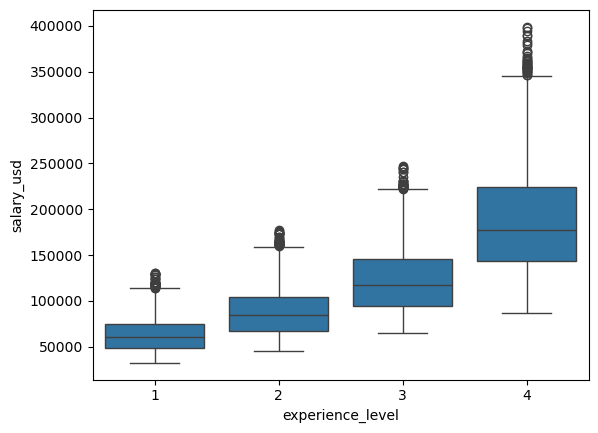

In [41]:
sns.boxplot(df,x='experience_level',y='salary_usd' )

###  Encoding `experience_level`

####  Column Description:
- `experience_level` represents the seniority of a data professional:
  - `EN`: Entry-Level (1)
  - `MI`: Mid-Level    (2)
  - `SE`: Senior       (3)
  - `EX`: Executive    (4)

#### Encoding Technique Used:

df['experience_level'] = df['experience_level'].map({'EN':1,'MI':2,'SE':3,'EX':4})


### Why Label Encoding?
experience_level is an ordinal categorical variable (it has a meaningful order: Entry < Mid < Senior < Executive).

Using Label Encoding preserves the ranking information.

Using One-Hot Encoding would incorrectly treat the levels as unordered and increase dimensionality unnecessarily.

### Boxplot Insight:
The boxplot of experience_level vs. salary_usd clearly shows:

As the experience level increases, the salary tends to increase.

This confirms the ordinal relationship between levels and salary.


In [44]:
def run_pipeline_linear_regression(df, target_col, test_size=0.2, random_state=42):
    """
    تدريب نموذج Linear Regression باستخدام Pipeline مع معالجة الأعمدة الرقمية والفئوية تلقائيًا.
    """
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score, mean_squared_error

    # فصل المتغير الهدف عن الميزات
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # تحديد أنواع الأعمدة
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

    # إعداد المحول (Preprocessor)
    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    # إنشاء البايبلاين
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    # تقسيم البيانات
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # تدريب النموذج
    pipeline.fit(X_train, y_train)

    # التنبؤ
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # النتائج
    print("\n📊 Linear Regression Results (Auto-Processed Features)")
    print("Train R² Score :", r2_score(y_train, y_train_pred))
    print("Test R² Score  :", r2_score(y_test, y_test_pred))
    print("Test MSE       :", mean_squared_error(y_test, y_test_pred))

    return pipeline


In [45]:
run_pipeline_linear_regression(df, target_col="salary_usd")



📊 Linear Regression Results (Auto-Processed Features)
Train R² Score : 0.8197831485249261
Test R² Score  : 0.8219718183366728
Test MSE       : 649302334.4640713


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['experience_level',
                                                   'company_size',
                                                   'remote_ratio',
                                                   'education_required',
                                                   'num_skills']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job_title',
                                                   'company_location',
                                                   'industry',
                                                   'company_name'])])),
                ('regressor', LinearRegression())])

### Linear Regression Model Evaluation
This linear regression model was trained using a pipeline that included both preprocessing steps and the estimator itself. The pipeline structure is as follows:

Numerical Features: Scaled using StandardScaler

Categorical Features: Encoded using OneHotEncoder

Model: LinearRegression

### Performance Metrics

| Metric             | Value         |
| ------------------ | ------------- |
| **Train R² Score** | 0.8198        |
| **Test R² Score**  | 0.8220        |
| **Test MSE**       | 64,930,233.46 |


 ### Interpretation:
The R² Score on both train and test sets is approximately 0.82, which indicates that the model explains 82% of the variance in salary prediction — a strong fit.

The Train vs. Test scores are nearly identical, suggesting low overfitting and good generalization to unseen data.

The Mean Squared Error (MSE) is around 64.9 million, which may appear high but is expected given that the salary_usd values are in large numeric ranges. For better interpretation, we may later compute RMSE or scale the target.

###  Deployment Readiness
This pipeline is suitable for deployment. Given that all preprocessing is embedded in the pipeline, it can accept raw input data from new users and directly output predictions — no additional manual processing is needed.


In [43]:
from sklearn.ensemble import RandomForestRegressor

def run_random_forest_regression(df, target_col="salary_usd", test_size=0.2, random_state=42):
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score, mean_squared_error

    columns_to_keep = [
        'salary_usd',
        'experience_level',
        'company_size',
        'remote_ratio',
        'education_required',
        'num_skills',
        'employment_type_FL',
        'employment_type_FT',
        'employment_type_PT'
    ]
    df = df[columns_to_keep].copy()

    # فصل الميزات عن الهدف
    X = df.drop(columns=[target_col])
    y = df[target_col]

    numeric_features = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=random_state))
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    print("\n🌲 Random Forest Regression Results")
    print("Train R² Score :", r2_score(y_train, y_train_pred))
    print("Test R² Score  :", r2_score(y_test, y_test_pred))
    print("Test MSE       :", mean_squared_error(y_test, y_test_pred))

    return pipeline


In [46]:
run_random_forest_regression(df, target_col="salary_usd", test_size=0.2, random_state=42)


🌲 Random Forest Regression Results
Train R² Score : 0.6993255578266742
Test R² Score  : 0.5740940824419369
Test MSE       : 1553359158.9194922


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['experience_level',
                                                   'company_size',
                                                   'remote_ratio',
                                                   'education_required',
                                                   'num_skills',
                                                   'employment_type_FL',
                                                   'employment_type_FT',
                                                   'employment_type_PT']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('regressor', RandomForestRegressor(random_state=42))])

### 🌲 Random Forest Regression Model Evaluation
This model utilizes a RandomForestRegressor within a preprocessing pipeline, combining:

Numerical Features: Scaled via StandardScaler

Categorical Features: Encoded via OneHotEncoder

Model: RandomForestRegressor (tree-based, non-linear)

### Performance Metrics

| Metric             | Value          |
| ------------------ | -------------- |
| **Train R² Score** | 0.699          |
| **Test R² Score**  | 0.574          |
| **Test MSE**       | 155,335,918.91 |



### Interpretation:
The Train R² Score indicates the model explains around 70% of the variance in the training set, which is decent.

However, the Test R² Score (≈ 57%) is significantly lower than that of the linear regression model, suggesting weaker generalization performance.

The Mean Squared Error (MSE) is more than double that of the linear model, indicating less precise predictions overall.

This may be due to overfitting on training data or suboptimal hyperparameters.
 

| Model                 | Train R² | Test R² | Test MSE       |
| --------------------- | -------- | ------- | -------------- |
| **Linear Regression** | 0.8198   | 0.8220  | 64,930,233.46  |
| **Random Forest**     | 0.6993   | 0.5740  | 155,335,918.91 |

 

## ✅ Conclusion:
The Linear Regression model currently outperforms the Random Forest model both in terms of accuracy and error. It is the better choice for deployment in this case.